In [1]:
!pip install gensim

     |████████████████████████████████| 24.2 MB 9.0 MB/s eta 0:00:011     |██████████████████▎             | 13.8 MB 10.6 MB/s eta 0:00:01


In [2]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 1.3 MB/s eta 0:00:01
  Created wheel for pyLDAvis: filename=pyLDAvis-3.2.2-py2.py3-none-any.whl size=135592 sha256=f6cd5ba18513c7abf45ffff78c9f2690301ce09c76cf45ee6dfa8412d1f29c65
  Stored in directory: /Users/jpasia/Library/Caches/pip/wheels/2a/5b/b3/26b52781cdeea9c815e147cfd4ac4a0a3472bce92142115670
Successfully built pyLDAvis


In [3]:
!pip install spacy

In [4]:
!pip install wordcloud

In [5]:
!pip install nltk

In [6]:
!pip install scikit-learn

In [7]:
!pip install scipy

In [8]:
!python -m spacy download en_core_web_lg

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [13]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

import gensim
import numpy as np
import spacy
import math

from scipy.sparse import csr_matrix
from sklearn.preprocessing import normalize

from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary
import pyLDAvis.gensim

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text

import os, re, operator, warnings
warnings.filterwarnings("ignore")
%matplotlib inline

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
import nltk
nltk.download("stopwords")
nltk.download("vader_lexicon")
nltk.download("punkt")
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jpasia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jpasia/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /Users/jpasia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [24]:
def clean(text):
    return str("".join([i if ord(i) < 128 else " " for i in text]))

In [25]:
test_data_dir = "{}".format(os.sep).join([gensim.__path__[0], "test", "test_data"])
lee_train_file = test_data_dir + os.sep + "lee_background.cor"

In [26]:
text = open(lee_train_file).read()
nlp = spacy.load("en_core_web_lg")
stop_words = stopwords.words("english")

In [27]:
for stop_word in stop_words:
    lexeme = nlp.vocab[stop_word]
    lexeme.is_stop = True

In [29]:
doc = nlp(clean(text))
doc

Hundreds of people have been forced to vacate their homes in the Southern Highlands of New South Wales as strong winds today pushed a huge bushfire towards the town of Hill Top. A new blaze near Goulburn, south-west of Sydney, has forced the closure of the Hume Highway. At about 4:00pm AEDT, a marked deterioration in the weather as a storm cell moved east across the Blue Mountains forced authorities to make a decision to evacuate people from homes in outlying streets at Hill Top in the New South Wales southern highlands. An estimated 500 residents have left their homes for nearby Mittagong. The New South Wales Rural Fire Service says the weather conditions which caused the fire to burn in a finger formation have now eased and about 60 fire units in and around Hill Top are optimistic of defending all properties. As more than 100 blazes burn on New Year's Eve in New South Wales, fire crews have been called to new fire at Gunning, south of Goulburn. While few details are available at this

In [30]:
texts, article = [], []
for w in doc:
    if w.text != "\n" and not w.is_punct and not w.like_num:
        article.append(w.lemma_)
    if w.text == "\n":
        texts.append(article)
        article = []

In [31]:
texts

[['hundred',
  'of',
  'people',
  'have',
  'be',
  'force',
  'to',
  'vacate',
  'their',
  'home',
  'in',
  'the',
  'Southern',
  'Highlands',
  'of',
  'New',
  'South',
  'Wales',
  'as',
  'strong',
  'wind',
  'today',
  'push',
  'a',
  'huge',
  'bushfire',
  'towards',
  'the',
  'town',
  'of',
  'Hill',
  'Top',
  'a',
  'new',
  'blaze',
  'near',
  'Goulburn',
  'south',
  'west',
  'of',
  'Sydney',
  'have',
  'force',
  'the',
  'closure',
  'of',
  'the',
  'Hume',
  'Highway',
  'at',
  'about',
  '4:00pm',
  'AEDT',
  'a',
  'marked',
  'deterioration',
  'in',
  'the',
  'weather',
  'as',
  'a',
  'storm',
  'cell',
  'move',
  'east',
  'across',
  'the',
  'Blue',
  'Mountains',
  'force',
  'authority',
  'to',
  'make',
  'a',
  'decision',
  'to',
  'evacuate',
  'people',
  'from',
  'home',
  'in',
  'outlying',
  'street',
  'at',
  'Hill',
  'Top',
  'in',
  'the',
  'New',
  'South',
  'Wales',
  'southern',
  'highland',
  'an',
  'estimated',
  'res

In [33]:
transformed_texts = [" ".join(i).lower() for i in texts]
transformed_texts

["hundred of people have be force to vacate their home in the southern highlands of new south wales as strong wind today push a huge bushfire towards the town of hill top a new blaze near goulburn south west of sydney have force the closure of the hume highway at about 4:00pm aedt a marked deterioration in the weather as a storm cell move east across the blue mountains force authority to make a decision to evacuate people from home in outlying street at hill top in the new south wales southern highland an estimated resident have leave their home for nearby mittagong the new south wales rural fire service say the weather condition which cause the fire to burn in a finger formation have now ease and about fire unit in and around hill top be optimistic of defend all property as more than blaze burn on new year 's eve in new south wales fire crew have be call to new fire at gunning south of goulburn while few detail be available at this stage fire authority say it have close the hume highw

In [37]:
transformed_texts_2 = [re.sub(r"\w*\d\w*", "", i).strip() for i in transformed_texts]
transformed_texts_2


["hundred of people have be force to vacate their home in the southern highlands of new south wales as strong wind today push a huge bushfire towards the town of hill top a new blaze near goulburn south west of sydney have force the closure of the hume highway at about : aedt a marked deterioration in the weather as a storm cell move east across the blue mountains force authority to make a decision to evacuate people from home in outlying street at hill top in the new south wales southern highland an estimated resident have leave their home for nearby mittagong the new south wales rural fire service say the weather condition which cause the fire to burn in a finger formation have now ease and about fire unit in and around hill top be optimistic of defend all property as more than blaze burn on new year 's eve in new south wales fire crew have be call to new fire at gunning south of goulburn while few detail be available at this stage fire authority say it have close the hume highway in

In [54]:
adjectives = []

for token in doc:
    candidate = token.text
#     print(token.text, token.pos_, token.dep_, spacy.explain(token.dep_))
    if token.pos_ == "ADJ" and candidate not in adjectives:
        adjectives.append(candidate)

print(len(adjectives))

955


In [51]:
print(adjectives)

['strong', 'huge', 'new', 'marked', 'outlying', 'southern', 'estimated', 'nearby', 'optimistic', 'more', 'few', 'available', 'little', 'less', 'significant', 'much', 'Indian', 'dead', 'long', 'Pakistani', 'extremist', 'military', 'Military', 'diplomatic', 'other', 'militant', 'national', 'fewer', 'same', 'last', 'free', 'political', 'economic', 'interim', 'stunned', 'key', 'fellow', 'massive', 'foreign', 'senior', 'Fresh', 'daunting', 'worst', 'international', 'inappropriate', 'unprofessional', 'further', 'chief', 'executive', 'able', 'concerned', 'annoyed', 'angry', 'next', 'safe', 'Afghani', 'secure', 'major', 'most', 'Many', 'mass', 'total', 'second', 'temporary', 'decisive', 'unseeded', 'first', 'unbeatable', 'old', 'eighth', 'shaky', '72nd', 'straight', 'better', 'Swiss', 'great', 'delighted', 'third', 'fifth', 'tough', 'top', 'junior', 'relative', 'tenacious', 'exhausting', 'hot', 'dusty', 'gruelling', 'welcome', 'milder', 'severe', 'dry', 'high', 'least', 'reluctant', 'excited',

In [65]:
adj = []
for text in transformed_texts_2:
    doc = nlp(text)
    adj.append([token.text for token in doc if token.pos_ == "ADJ"])

In [67]:
from itertools import chain

adj_ = list(chain(*adj))
adj__ = list(set(adj_))
len(adj__)

1013

In [82]:
entities = []
for text in transformed_texts_2:
    parsed = nlp(text)
    for entity in parsed.ents: # get entities in nlp document
        if entity.text not in entities:
            entities.append(entity.text)
        
len(entities)

640

In [64]:
entities

['hundred',
 'today',
 'sydney',
 'claire richards',
 'less than about millimetre',
 'kashmiri',
 'more than dozen',
 'india',
 'pakistan',
 'december',
 'yesterday',
 'hafiz mohammed',
 'karachi',
 'the christmas new year holiday',
 'last year',
 'argentina',
 'a week ago',
 'only a week ago',
 'year',
 'work hour',
 'next week',
 'britain',
 'europe',
 'afghanistan',
 'perth',
 'the year old',
 'roger federer',
 'the tennis year',
 'the new year',
 'american',
 'years eve',
 'this afternoon',
 'last thursday',
 'about $',
 'overnight',
 'at least friday',
 "about last night 's",
 'the next few day',
 'kilometre',
 'newcastle',
 'this morning',
 'grafton',
 'phil',
 'picton',
 'robertson',
 'ten of thousand',
 'queensland',
 'last night',
 'the night',
 'early evening',
 'alejandro',
 'pervez musharraf',
 'musharraf',
 'friday',
 'vajpayee',
 'january',
 'indian',
 'abdul sattar',
 'saturday',
 'sunday',
 'afghan',
 'british',
 'week',
 'abdullah',
 'israeli',
 'palestinian',
 'palest

In [72]:
def IDF(corpus, unique_words):
    idf_dict = {}
    N = len(corpus)
    for i in unique_words:
        count = 0
        for sen in corpus:
            if i in sen.split():
                count = count + 1
            idf_dict[i] = (math.log((N+1)/(count+1)))+1
    return idf_dict

In [73]:
def fit(whole_data):
    unique_words = set()
    if isinstance(whole_data, (list, )):
        for x in whole_data:
            for y in x.split():
                if len(y) < 2:
                    continue
                unique_words.add(y)
        unique_words = sorted(list(unique_words))
        vocab = {j:i for i, j in enumerate(unique_words)}
        idf_values_unique_words = IDF(whole_data, unique_words)
    return vocab, idf_values_unique_words

In [74]:
def transform(dataset, vocabulary, idf_values):
    vocab = {}
    m_range = len(dataset)
    n_range = len(vocabulary)
    sparse_matrix = csr_matrix((m_range, n_range), dtype=np.float64)
    for row in range(0, m_range):
        words = dataset[row].split()
        word_count_in_sentence = Counter(words)
        for word in words:
            if word in list(vocabulary.keys()):
                tf_idf_value = (word_count_in_sentence[word]/len(words))*(idf_values[word])
                sparse_matrix[row, vocabulary[word]] = tf_idf_value
                vocab[word] = tf_idf_value
    return vocab
    

In [76]:
Vocabulary, idf_of_vocabulary = fit(transformed_texts_2)

In [77]:
idf_of_vocabulary

{"'d": 5.31748811353631,
 "'ll": 4.401197381662156,
 "'s": 1.4780358009429997,
 "'ve": 3.371577964480997,
 'aamer': 6.0106352940962555,
 'aarage': 6.0106352940962555,
 'abandon': 5.0943445622221,
 'abate': 5.605170185988092,
 'abbott': 6.0106352940962555,
 'abc': 5.605170185988092,
 'abdel': 5.605170185988092,
 'abdomen': 6.0106352940962555,
 'abdominal': 6.0106352940962555,
 'abduct': 6.0106352940962555,
 'abduction': 6.0106352940962555,
 'abdul': 5.0943445622221,
 'abdullah': 5.605170185988092,
 'abegglen': 5.31748811353631,
 'abide': 6.0106352940962555,
 'ability': 4.912023005428146,
 'able': 3.870569130599985,
 'abloy': 5.31748811353631,
 'ablution': 6.0106352940962555,
 'ably': 6.0106352940962555,
 'aboard': 4.7578723256008875,
 'aboriginal': 5.31748811353631,
 'abortion': 6.0106352940962555,
 'about': 2.2494351784026936,
 'above': 4.7578723256008875,
 'abroad': 5.605170185988092,
 'abruptly': 6.0106352940962555,
 'abscond': 5.605170185988092,
 'absolutely': 4.506557897319982,
 'a

In [78]:
sorted_idf = dict(sorted(idf_of_vocabulary.items(), key=operator.itemgetter(1), reverse=True))


In [79]:
sorted_idf

{'aamer': 6.0106352940962555,
 'aarage': 6.0106352940962555,
 'abbott': 6.0106352940962555,
 'abdomen': 6.0106352940962555,
 'abdominal': 6.0106352940962555,
 'abduct': 6.0106352940962555,
 'abduction': 6.0106352940962555,
 'abide': 6.0106352940962555,
 'ablution': 6.0106352940962555,
 'ably': 6.0106352940962555,
 'abortion': 6.0106352940962555,
 'abruptly': 6.0106352940962555,
 'abstain': 6.0106352940962555,
 'aca': 6.0106352940962555,
 'academic': 6.0106352940962555,
 'accc': 6.0106352940962555,
 'accelerate': 6.0106352940962555,
 'acceptable': 6.0106352940962555,
 'accolade': 6.0106352940962555,
 'accommodation': 6.0106352940962555,
 'accountable': 6.0106352940962555,
 'accounting': 6.0106352940962555,
 'accrue': 6.0106352940962555,
 'accuracy': 6.0106352940962555,
 'accusation': 6.0106352940962555,
 'achievement': 6.0106352940962555,
 'acquisition': 6.0106352940962555,
 'activist': 6.0106352940962555,
 'actress': 6.0106352940962555,
 'adams': 6.0106352940962555,
 'adhere': 6.010635

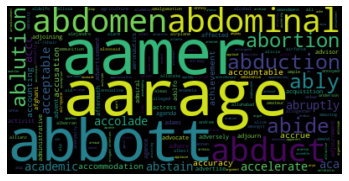

In [80]:
wordcloud = WordCloud().generate_from_frequencies(idf_of_vocabulary)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [85]:
stop_words.extend(["aamer", "aarage"])
stopwords_dict = Counter(stop_words)
transformed_texts_3 = [" ".join([word for word in i.split() if word not in stopwords_dict]) for i in transformed_texts_2]


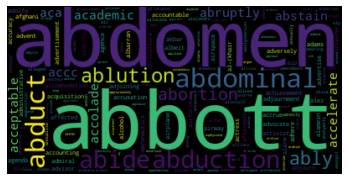

In [86]:
Vocabulary, idf_of_vocabulary = fit(transformed_texts_3)
wordcloud = WordCloud().generate_from_frequencies(idf_of_vocabulary)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [87]:
final_output = transform(transformed_texts_3, Vocabulary, idf_of_vocabulary)
final_output


{'hundred': 0.01672548559982472,
 'people': 0.03225865903261846,
 'force': 0.07822871767300714,
 'vacate': 0.03357896812344277,
 'home': 0.0343967695326776,
 'southern': 0.056920134273529197,
 'highlands': 0.03357896812344277,
 'new': 0.03228634290258631,
 'south': 0.03610716518539474,
 'wales': 0.048567427838147735,
 'strong': 0.17126412082300818,
 'wind': 0.023399962812002496,
 'today': 0.0397915913750073,
 'push': 0.017001253430060165,
 'huge': 0.010764718004644576,
 'bushfire': 0.02905731209582683,
 'towards': 0.05956354170327909,
 'town': 0.01429525000878698,
 'hill': 0.3013482732048715,
 'top': 0.052084886726767914,
 'blaze': 0.0660815600777901,
 'near': 0.04716580754690766,
 'goulburn': 0.06715793624688554,
 'west': 0.01166281786614444,
 'sydney': 0.032275750683471736,
 'closure': 0.027837948427443172,
 'hume': 0.15569917183300255,
 'highway': 0.07675035945981479,
 'aedt': 0.0223336546430821,
 'marked': 0.03357896812344277,
 'deterioration': 0.03357896812344277,
 'weather': 0.06

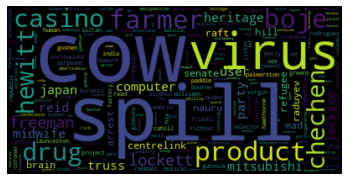

In [89]:
wordcloud = WordCloud().generate_from_frequencies(final_output)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Shortcut of TF-IDF

In [91]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, encoding="latin-1",
                        ngram_range=(1,1), stop_words=stop_words)

In [92]:
features = tfidf.fit_transform(transformed_texts_3)
d = tfidf.vocabulary_

In [93]:
d

{'hundred': 523,
 'people': 782,
 'force': 433,
 'home': 511,
 'southern': 1012,
 'new': 723,
 'south': 1011,
 'wales': 1170,
 'strong': 1041,
 'wind': 1202,
 'today': 1102,
 'push': 852,
 'huge': 521,
 'towards': 1114,
 'town': 1115,
 'hill': 504,
 'top': 1108,
 'blaze': 143,
 'near': 713,
 'west': 1192,
 'sydney': 1067,
 'highway': 502,
 'aedt': 27,
 'weather': 1186,
 'storm': 1036,
 'move': 700,
 'east': 348,
 'across': 13,
 'blue': 146,
 'mountains': 699,
 'authority': 112,
 'make': 645,
 'decision': 298,
 'evacuate': 374,
 'street': 1038,
 'resident': 908,
 'leave': 613,
 'nearby': 714,
 'rural': 943,
 'fire': 423,
 'service': 973,
 'say': 947,
 'condition': 244,
 'cause': 194,
 'burn': 172,
 'ease': 347,
 'unit': 1144,
 'around': 93,
 'defend': 303,
 'property': 840,
 'year': 1219,
 'eve': 375,
 'crew': 270,
 'call': 179,
 'detail': 313,
 'available': 113,
 'stage': 1024,
 'close': 224,
 'direction': 324,
 'meanwhile': 668,
 'long': 634,
 'threaten': 1095,
 'area': 87,
 'rain': 8

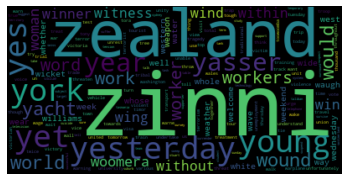

In [94]:
wordcloud = WordCloud().generate_from_frequencies(d)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [95]:
sid = SentimentIntensityAnalyzer()
for i in range(len(transformed_texts_3)):
    print(transformed_texts_3[i] + ":")
    scores = sid.polarity_scores(transformed_texts_3[i])
    print(scores)

hundred people force vacate home southern highlands new south wales strong wind today push huge bushfire towards town hill top new blaze near goulburn south west sydney force closure hume highway : aedt marked deterioration weather storm cell move east across blue mountains force authority make decision evacuate people home outlying street hill top new south wales southern highland estimated resident leave home nearby mittagong new south wales rural fire service say weather condition cause fire burn finger formation ease fire unit around hill top optimistic defend property blaze burn new year 's eve new south wales fire crew call new fire gunning south goulburn detail available stage fire authority say close hume highway direction meanwhile new fire sydney 's west long threaten property cranebrook area rain fall part illawarra sydney hunter valley north coast bureau meteorology 's claire richards say rain little ease fire still burn across state fall quite isolate area generally fall l

{'neg': 0.27, 'neu': 0.654, 'pos': 0.076, 'compound': -0.9899}
federal government call labor delay plan increase australian security intelligence organisation 's asio power combat terrorism labor want parliamentary inquiry set examine proposal significantly increase asio 's power detain interrogate suspect propose legislation go parliament next year asio would power detain suspect hour without charge legal representation opposition 's push investigation successful could postpone debate bill several month labor 's spokesman home affairs john faulkner say opposition want unnecessarily delay propose legislation want make sure deal quickly parliament also want make sure important unprecedented new power asio get thorough public examination air possible say attorney general daryl williams say government rely labor obstruct bill 's passage look labor 's support say labor support counter terrorism proposal put forward believe appropriate support well meanwhile federal government pressure rele

{'neg': 0.098, 'neu': 0.821, 'pos': 0.081, 'compound': 0.1531}
indonesian troop enforcement start arrive central sulawesi government attempt end day deadly clash christians muslims violence last week claim least life leave thousand people homeless police soldier send disarm rival group restore calm new report violence resident christian town tena say fear attack muslim militiaman take position hill around town region fighting muslims christians claim hundred life last year many blame late upsurge violence arrival member laskar jihad muslim militia training camp java neighbouring maluka islands:
{'neg': 0.259, 'neu': 0.693, 'pos': 0.047, 'compound': -0.9648}
america 's cup winner sir peter blake successful sailor yachting history kill shooting amazonia brazil today sponsor say mr blake aboard boat crew attack pirate shoot dead say afp report sponsor pr company jour j say kill lead sailing expedition amazon river western amazon basin new zealander win america 's cup twice team new zealan

In [96]:
### TOPIC MODELING

texts

[['hundred',
  'of',
  'people',
  'have',
  'be',
  'force',
  'to',
  'vacate',
  'their',
  'home',
  'in',
  'the',
  'Southern',
  'Highlands',
  'of',
  'New',
  'South',
  'Wales',
  'as',
  'strong',
  'wind',
  'today',
  'push',
  'a',
  'huge',
  'bushfire',
  'towards',
  'the',
  'town',
  'of',
  'Hill',
  'Top',
  'a',
  'new',
  'blaze',
  'near',
  'Goulburn',
  'south',
  'west',
  'of',
  'Sydney',
  'have',
  'force',
  'the',
  'closure',
  'of',
  'the',
  'Hume',
  'Highway',
  'at',
  'about',
  '4:00pm',
  'AEDT',
  'a',
  'marked',
  'deterioration',
  'in',
  'the',
  'weather',
  'as',
  'a',
  'storm',
  'cell',
  'move',
  'east',
  'across',
  'the',
  'Blue',
  'Mountains',
  'force',
  'authority',
  'to',
  'make',
  'a',
  'decision',
  'to',
  'evacuate',
  'people',
  'from',
  'home',
  'in',
  'outlying',
  'street',
  'at',
  'Hill',
  'Top',
  'in',
  'the',
  'New',
  'South',
  'Wales',
  'southern',
  'highland',
  'an',
  'estimated',
  'res

In [97]:
bigram = gensim.models.Phrases(texts)

In [98]:
texts = [bigram[line] for line in texts]

In [99]:
texts

[['hundred_of',
  'people',
  'have',
  'be',
  'force',
  'to',
  'vacate',
  'their',
  'home',
  'in',
  'the',
  'Southern',
  'Highlands',
  'of',
  'New_South',
  'Wales',
  'as',
  'strong',
  'wind',
  'today',
  'push',
  'a',
  'huge',
  'bushfire',
  'towards',
  'the',
  'town',
  'of',
  'Hill',
  'Top',
  'a',
  'new',
  'blaze',
  'near',
  'Goulburn',
  'south_west',
  'of',
  'Sydney',
  'have',
  'force',
  'the',
  'closure',
  'of',
  'the',
  'Hume',
  'Highway',
  'at',
  'about',
  '4:00pm',
  'AEDT',
  'a',
  'marked',
  'deterioration',
  'in',
  'the',
  'weather',
  'as',
  'a',
  'storm',
  'cell',
  'move',
  'east',
  'across',
  'the',
  'Blue_Mountains',
  'force',
  'authority',
  'to',
  'make',
  'a',
  'decision',
  'to',
  'evacuate',
  'people',
  'from',
  'home',
  'in',
  'outlying',
  'street',
  'at',
  'Hill',
  'Top',
  'in',
  'the',
  'New_South',
  'Wales',
  'southern',
  'highland',
  'an',
  'estimated',
  'resident',
  'have',
  'leav

In [100]:
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [101]:
corpus

[[(0, 3),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 2),
  (10, 1),
  (11, 2),
  (12, 3),
  (13, 2),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 4),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 3),
  (25, 3),
  (26, 1),
  (27, 4),
  (28, 1),
  (29, 8),
  (30, 3),
  (31, 2),
  (32, 2),
  (33, 1),
  (34, 4),
  (35, 1),
  (36, 2),
  (37, 1),
  (38, 5),
  (39, 1),
  (40, 5),
  (41, 2),
  (42, 1),
  (43, 10),
  (44, 1),
  (45, 2),
  (46, 1),
  (47, 3),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 2),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 3),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 7),
  (75, 1),
  (76, 1),
  (77, 3),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 11),
  (85, 1),
  (86, 3),
  (87, 1),
  (88, 1),
  (89, 14),
  (90, 1),
  (91,

In [108]:
lsi_model = LsiModel(corpus=corpus, num_topics=10, id2word = dictionary)
lsi_model.show_topics(num_topics=5)

[(0,
  '0.694*"the" + 0.372*"be" + 0.253*"to" + 0.241*"of" + 0.220*"in" + 0.207*"and" + 0.198*"a" + 0.168*"have" + 0.121*"say" + 0.082*"for"'),
 (1,
  '0.670*"be" + -0.416*"the" + 0.290*"to" + -0.199*"of" + 0.171*"say" + -0.124*"in" + 0.113*"that" + 0.095*"have" + 0.094*"will" + 0.091*"it"'),
 (2,
  '-0.434*"a" + 0.416*"the" + -0.353*"in" + -0.259*"and" + -0.250*"he" + -0.201*"his" + -0.188*"to" + -0.157*"israeli" + -0.146*"Mr_Arafat" + -0.114*"palestinian"'),
 (3,
  '-0.657*"to" + 0.281*"be" + 0.263*"in" + 0.236*"have" + 0.165*"he" + -0.159*"will" + 0.149*"a" + 0.128*"of" + -0.128*"we" + -0.117*"and"'),
 (4,
  '0.462*"a" + -0.461*"in" + 0.451*"of" + -0.208*"and" + 0.134*"for" + 0.116*"his" + -0.102*"have" + -0.091*"it" + 0.090*"Mr" + 0.087*"he"')]

In [109]:
lda_model = LdaModel(corpus=corpus, num_topics=10, id2word = dictionary)
lda_model.show_topics()

[(0,
  '0.070*"the" + 0.048*"be" + 0.034*"to" + 0.025*"in" + 0.025*"a" + 0.022*"of" + 0.017*"and" + 0.014*"have" + 0.011*"say" + 0.008*"that"'),
 (1,
  '0.004*"the" + 0.003*"be" + 0.002*"to" + 0.002*"and" + 0.002*"a" + 0.002*"have" + 0.001*"in" + 0.001*"of" + 0.001*"we" + 0.001*"for"'),
 (2,
  '0.033*"the" + 0.019*"be" + 0.019*"to" + 0.015*"have" + 0.015*"a" + 0.012*"in" + 0.011*"of" + 0.009*"say" + 0.007*"and" + 0.007*"for"'),
 (3,
  '0.081*"the" + 0.029*"be" + 0.026*"of" + 0.026*"to" + 0.021*"and" + 0.021*"have" + 0.017*"a" + 0.016*"in" + 0.014*"say" + 0.010*"for"'),
 (4,
  '0.062*"the" + 0.039*"be" + 0.025*"of" + 0.023*"and" + 0.023*"in" + 0.022*"a" + 0.019*"to" + 0.016*"say" + 0.016*"have" + 0.011*"he"'),
 (5,
  '0.019*"the" + 0.011*"be" + 0.006*"have" + 0.005*"in" + 0.005*"a" + 0.005*"of" + 0.004*"and" + 0.003*"say" + 0.003*"to" + 0.003*"it"'),
 (6,
  '0.023*"the" + 0.018*"be" + 0.011*"a" + 0.011*"and" + 0.010*"to" + 0.010*"have" + 0.009*"of" + 0.008*"in" + 0.006*"it" + 0.006*"for

In [111]:
hdp_model = HdpModel(corpus=corpus, id2word = dictionary)
hdp_model.show_topics()

[(0,
  "0.040*the + 0.017*be + 0.015*of + 0.013*to + 0.012*in + 0.011*a + 0.010*and + 0.007*have + 0.007*say + 0.005*on + 0.004*for + 0.004*he + 0.003*'s + 0.003*it + 0.003*that + 0.003*into + 0.003*but + 0.003*by + 0.003*US + 0.002*we"),
 (1,
  '0.037*the + 0.017*of + 0.015*be + 0.013*to + 0.012*and + 0.011*in + 0.011*a + 0.009*have + 0.005*say + 0.005*they + 0.004*on + 0.003*we + 0.003*will + 0.003*with + 0.003*it + 0.003*for + 0.003*he + 0.003*by + 0.003*that + 0.003*group'),
 (2,
  "0.031*the + 0.014*be + 0.013*of + 0.011*in + 0.011*a + 0.010*and + 0.010*to + 0.008*have + 0.006*say + 0.004*he + 0.004*that + 0.004*for + 0.004*israeli + 0.004*'s + 0.004*on + 0.003*after + 0.003*from + 0.003*airport + 0.003*by + 0.002*kill"),
 (3,
  '0.025*the + 0.015*be + 0.009*to + 0.009*of + 0.009*a + 0.007*in + 0.006*and + 0.006*have + 0.004*for + 0.004*say + 0.004*will + 0.003*that + 0.003*on + 0.003*it + 0.003*at + 0.002*we + 0.002*they + 0.002*over + 0.002*after + 0.002*an'),
 (4,
  "0.024*the 

In [113]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.077565 -0.006364       1        1  36.955121
0      0.075987  0.002108       2        1  36.194862
8      0.060251 -0.014414       3        1  12.077958
4      0.060287  0.014803       4        1  10.248321
7      0.039600  0.008126       5        1   3.718256
2     -0.017377 -0.002826       6        1   0.315567
9     -0.038646 -0.023068       7        1   0.260514
6     -0.032824  0.017518       8        1   0.123252
5     -0.077478  0.003273       9        1   0.053076
1     -0.147365  0.000844      10        1   0.053075, topic_info=           Term         Freq        Total Category  logprob  loglift
141         the  4029.000000  4029.000000  Default  30.0000  30.0000
43           be  2118.000000  2118.000000  Default  29.0000  29.0000
149          to  1519.000000  1519.000000  Default  28.0000  28.0000
84         have   992.000000   992.000000  Default  27.0000  27.0000
29            a  1139.000000  1139.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
2431  Mr_Arafat     0.013207    51.613335  Topic10  -7.7193  -0.7296
301         his     0.014896   238.216722  Topic10  -7.5989  -2.1386
161        with     0.015103   290.342436  Topic10  -7.5852  -2.3227
109         not     0.013795   179.119101  Topic10  -7.6757  -1.9303
368      he_say     0.013613   195.782776  Topic10  -7.6890  -2.0325

[766 rows x 6 columns], token_table=      Topic      Freq Term
term                      
0         1  0.388936   's
0         2  0.344802   's
0         3  0.102061   's
0         4  0.129645   's
0         5  0.027584   's
...     ...       ...  ...
598       1  0.526895  you
598       2  0.292719  you
598       3  0.073180  you
598       4  0.073180  you
598       5  0.029272  you

[955 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 9, 5, 8, 3, 10, 7, 6, 2])

In [114]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(hdp_model, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster          Freq
topic                                                   
0     -0.163924  0.016846       1        1  2.631972e+01
1     -0.166779  0.014357       2        1  2.396752e+01
2     -0.156703  0.037153       3        1  1.224364e+01
3     -0.127129 -0.025429       4        1  8.194476e+00
5     -0.104210 -0.002123       5        1  4.396031e+00
...         ...       ...     ...      ...           ...
144    0.028548 -0.012171     146        1  2.111491e-21
146    0.023611 -0.025470     147        1  5.668477e-22
147    0.024568 -0.022502     148        1  2.834147e-22
148    0.027016  0.001340     149        1  1.417073e-22
149    0.020857  0.038007     150        1  1.417073e-22

[150 rows x 5 columns], topic_info=               Term          Freq        Total  Category  logprob  loglift
141             the  1.656000e+03  1656.000000   Default  30.0000  30.0000
111              of  6.690000e+02   669.000000   Default  29.0000  29.0000
89               in  5.170000e+02   517.000000   Default  28.0000  28.0000
43               be  7.710000e+02   771.000000   Default  27.0000  27.0000
29                a  4.970000e+02   497.000000   Default  26.0000  26.0000
...             ...           ...          ...       ...      ...      ...
5806  unforeseeable  6.624968e-23     5.923358  Topic150  -7.0887   2.0659
1886           Team  7.021986e-23     8.785065  Topic150  -7.0305   1.7300
596           world  7.846882e-23    22.619945  Topic150  -6.9194   0.8953
3541       Faulkner  6.883196e-23     7.679579  Topic150  -7.0504   1.8445
5910       relevant  6.633846e-23     8.738783  Topic150  -7.0873   1.6784

[8062 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
776       1  0.293425       
776       2  0.403460       
776       4  0.110034       
776       5  0.036678       
471       1  0.080016      $
...     ...       ...    ...
1752      5  0.089229   your
5285      2  0.302514  youth
3050      1  0.222245   zone
3050      2  0.222245   zone
3050      8  0.222245   zone

[11760 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 6, 5, 8, 9, 7, 10, 11, 12, 14, 20, 22, 19, 13, 17, 18, 15, 16, 21, 34, 28, 24, 25, 40, 45, 29, 51, 30, 31, 23, 26, 27, 44, 67, 46, 36, 56, 48, 146, 38, 69, 57, 50, 66, 32, 33, 39, 35, 37, 41, 43, 42, 47, 49, 52, 54, 53, 55, 59, 58, 60, 61, 62, 63, 65, 64, 68, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 147, 148, 149, 150])

In [115]:
lsi_topics = [[word for word, prob in topic] for topic_id, topic in lsi_model.show_topics(formatted=False)]
lda_topics = [[word for word, prob in topic] for topic_id, topic in lda_model.show_topics(formatted=False)]
hdp_topics = [[word for word, prob in topic] for topic_id, topic in hdp_model.show_topics(formatted=False)]

In [116]:
lsi_coherence = CoherenceModel(topics=lsi_topics[:10], texts=texts, dictionary=dictionary, window_size=10).get_coherence()
lda_coherence = CoherenceModel(topics=lda_topics[:10], texts=texts, dictionary=dictionary, window_size=10).get_coherence()
hdp_coherence = CoherenceModel(topics=hdp_topics[:10], texts=texts, dictionary=dictionary, window_size=10).get_coherence()

In [117]:
lsi_coherence, lda_coherence, hdp_coherence

(0.21913533039568164, 0.20534502769187588, 0.10563767849708301)

In [120]:
def evaluate_bar_graph(coherences, indices):
    assert len(coherences) == len(indices)
    n = len(coherences)
    x = np.arange(n)
    plt.bar(x, coherences, width=0.2, tick_label=indices, align="center")
    plt.xlabel("Models")
    plt.ylabel("Coherence Value")
    plt.title("Comparison of Topic Models")

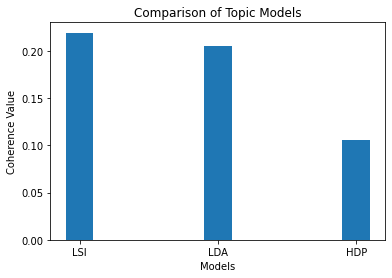

In [121]:
evaluate_bar_graph([lsi_coherence, lda_coherence, hdp_coherence], ["LSI", "LDA", "HDP"])